# 군집화

In [ ]:
import os
import pandas as pd
import numpy as np
import hds
from plt_rcs import *

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../../data')

In [ ]:
sorted(os.listdir())

In [ ]:
objs = pd.read_pickle('Cereal.pkl')

- 딕셔너리 형태의 pkl 파일을 key를 변수명으로 한 변수로 한번에 등록

In [ ]:
globals().update(objs)

In [ ]:
df, df_scaled, pca_score = df, df_scaled, pca_score

## 계층적 군집화 모델 학습

In [ ]:
from scipy.cluster.hierarchy import linkage

In [ ]:
hc = linkage(
    y=df_scaled, method='single', metric='euclidean',
    optimal_ordering=True
)

## 덴드로그램 시각화

In [10]:
from scipy.cluster.hierarchy import dendrogram

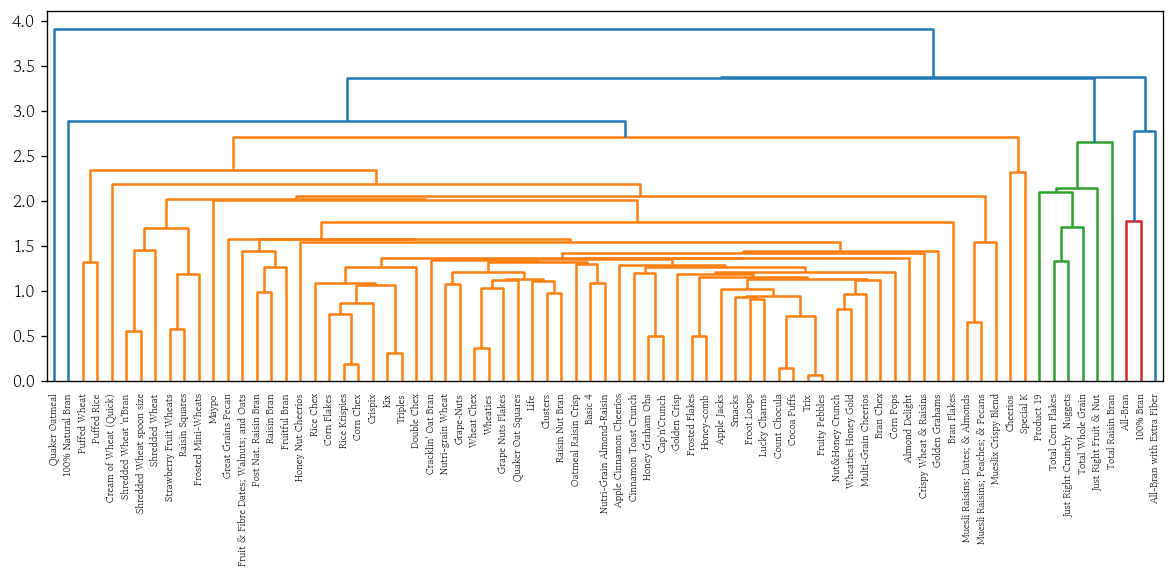

In [13]:
plt.figure(figsize=(12, 4))
dendrogram(Z=hc, orientation='top', labels=df.index)
plt.show()

## 계층적 군집화 시각화 함수 생성

In [14]:
def plot_dendrogram(y, method):
    hc = linkage(
    y=y, method=method, metric='euclidean',
    optimal_ordering=True
)   
    plt.figure(figsize=(12, 4))
    dendrogram(Z=hc, orientation='top', labels=df.index)
    plt.show()

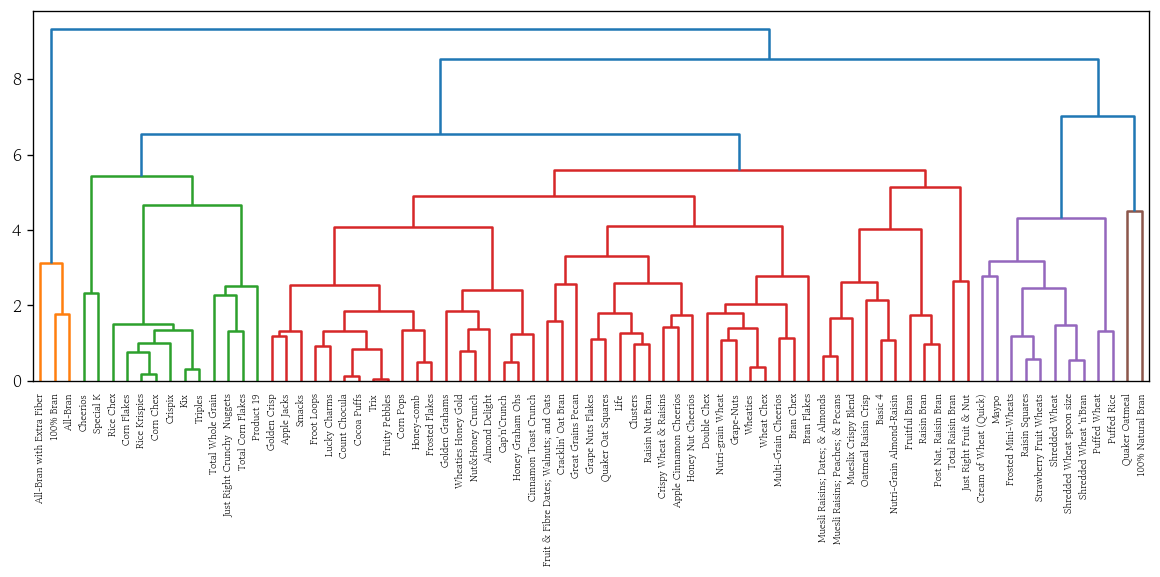

In [15]:
plot_dendrogram(y=df_scaled, method='complete')

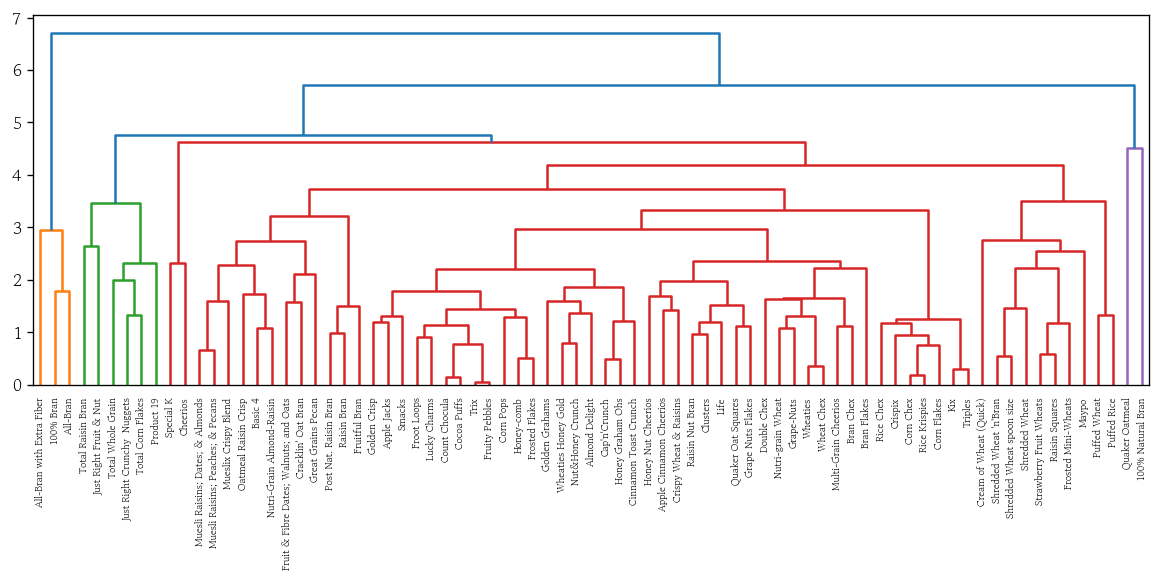

In [16]:
plot_dendrogram(y=df_scaled, method='average')

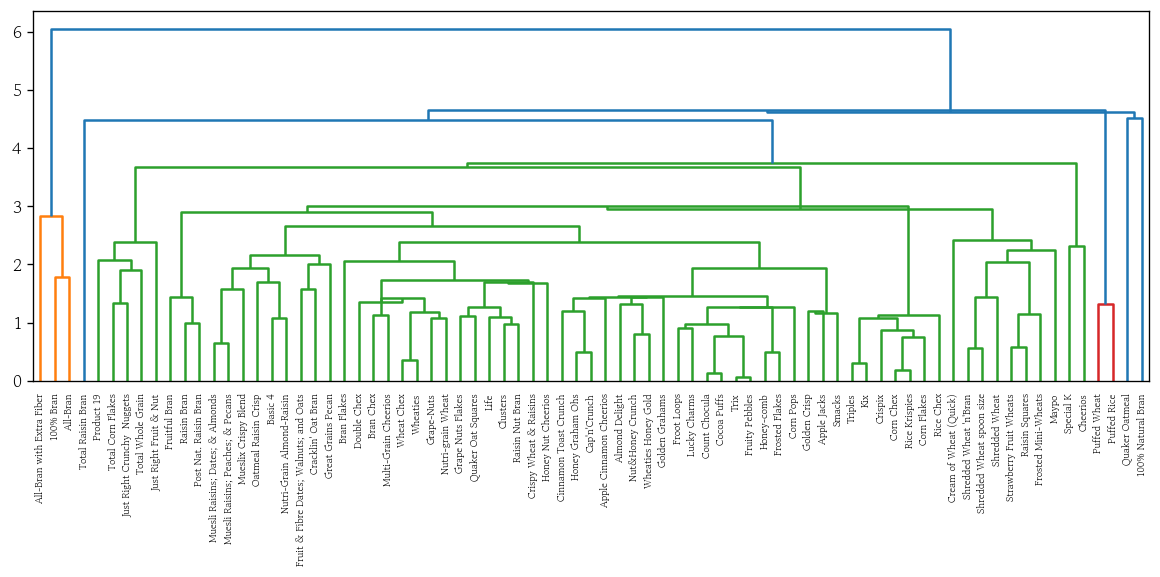

In [17]:
plot_dendrogram(y=df_scaled, method='centroid')

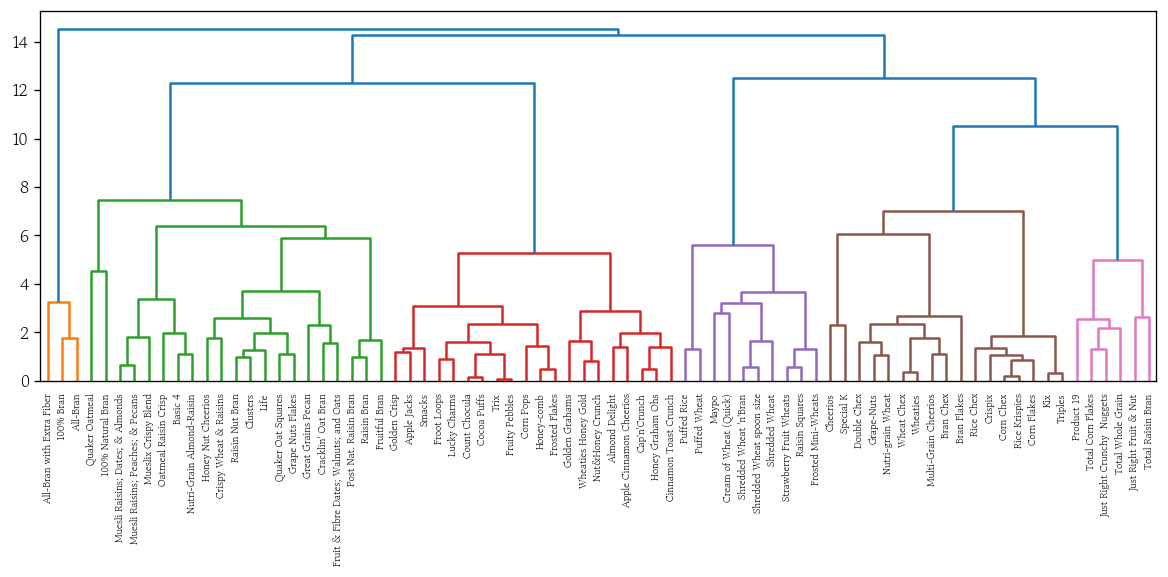

In [18]:
plot_dendrogram(y=df_scaled, method='ward')

## k-means 군집화 모델 학습

In [19]:
from sklearn.cluster import KMeans

In [ ]:
# k-means 군집화 모델 생성
model = KMeans(n_clusters=8, init='k-means++', random_state=0)

In [ ]:
# 표준화된 데이터로 군집화 모델 학습
model.fit(X=df_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",8
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


## 결과 확인

In [ ]:
# 군집 정보 확인
cluster_labels = model.predict(X=df_scaled)
cluster_labels
# array([4, 6, 4, 4, 0, 0, 0, 6, 5, 5, 0, 5, 0, 6, 0, 2, 2, 0, 0, 6, 3, 2,
#        0, 2, 0, 0, 3, 1, 1, 0, 0, 0, 5, 5, 6, 0, 0, 0, 7, 7, 2, 5, 0, 3,
#        6, 6, 6, 5, 0, 6, 5, 6, 1, 7, 3, 3, 5, 4, 1, 6, 3, 2, 2, 3, 3, 3,
#        0, 5, 3, 7, 1, 7, 2, 0, 5, 5, 0], dtype=int32)

array([4, 6, 4, 4, 0, 0, 0, 6, 5, 5, 0, 5, 0, 6, 0, 2, 2, 0, 0, 6, 3, 2,
       0, 2, 0, 0, 3, 1, 1, 0, 0, 0, 5, 5, 6, 0, 0, 0, 7, 7, 2, 5, 0, 3,
       6, 6, 6, 5, 0, 6, 5, 6, 1, 7, 3, 3, 5, 4, 1, 6, 3, 2, 2, 3, 3, 3,
       0, 5, 3, 7, 1, 7, 2, 0, 5, 5, 0], dtype=int32)

In [ ]:
pd.Series(data=cluster_labels).value_counts().sort_index()
# 0    22
# 1     5
# 2     8
# 3    10
# 4     4
# 5    12
# 6    11
# 7     5
# Name: count, dtype: int64

0    22
1     5
2     8
3    10
4     4
5    12
6    11
7     5
Name: count, dtype: int64

## 군집 내 거리 제곱합

In [30]:
plt.rc(group='figure', figsize=(4, 4))

In [ ]:
model.inertia_
# 215.61245219621284

215.61245219621284

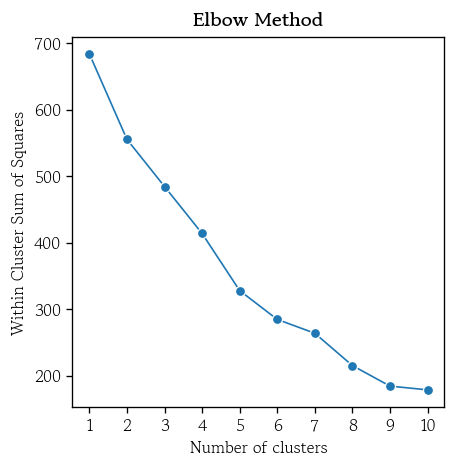

In [31]:
hds.plot.wcss(X=df_scaled, k=10)

## 실루엣 계수

In [32]:
df1 = df_scaled.copy()

In [33]:
df1['cluster'] = cluster_labels
df1.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,cluster
0,-1.892984,1.328607,-0.012903,-0.353984,3.292847,-2.270748,-0.211417,2.580956,-0.145317,4
1,0.673209,0.415190,3.961373,-1.725771,-0.063754,-1.561907,0.240781,0.545901,-1.264260,6
2,-1.892984,1.328607,-0.012903,1.196731,2.873272,-1.798187,-0.437516,3.142351,-0.145317,4
3,-2.919461,1.328607,-1.006473,-0.234699,4.971147,-1.561907,-1.568012,3.282700,-0.145317,4
4,0.159970,-0.498228,0.980666,0.481016,-0.483329,-0.144223,0.240781,-1.348805,-0.145317,0


In [34]:
from sklearn.metrics import silhouette_score

In [ ]:
# 전체 관측값의 실루엣 계수 평균 확인
silhouette_score(X=df_scaled, labels=cluster_labels)
# 0.3075777347145458

0.3075777347145458

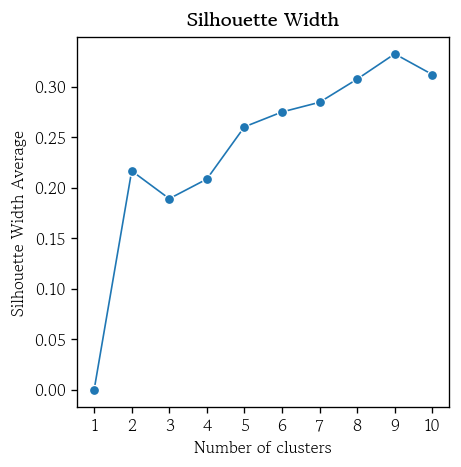

In [36]:
hds.plot.silhouette(X=df_scaled, k=10)

## 최적의 k를 적용한 k-means 군집화 모델 학습

In [ ]:
# 기존 모델에 최적의 k를 설정 후 재학습
model.set_params(n_clusters=6).fit(X=df_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",6
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [ ]:
# 최적 모델의 군집 정보를 추가
df['k-means'] = model.predict(X=df_scaled)

In [ ]:
df['k-means'].value_counts().sort_index()
# k-means
# 0    24
# 1     7
# 2    18
# 3    15
# 4    10
# 5     3
# Name: count, dtype: int64

k-means
0    24
1     7
2    18
3    15
4    10
5     3
Name: count, dtype: int64

In [ ]:
# 최적 모델에 대한 실루엣 계수의 평균 확인
silhouette_score(X=df_scaled, labels=df['k-means'])
# 0.2750794137284007

0.2750794137284007

## 군집별 특징 확인

In [42]:
df = df.reset_index()

In [43]:
df.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,k-means
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,5
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,3
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,5
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,5
4,Almond Delight,110,2,2,200,1.0,14.0,8,0,25,0


In [44]:
df.groupby(by='k-means').mean(numeric_only=True).round(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
k-means,,,,,,,,,
0,109.583,1.583,1.042,173.333,0.792,12.708,10.875,50.417,25.000
1,124.286,3.000,1.000,194.286,4.714,13.714,11.429,210.000,35.714
2,107.222,2.556,0.444,226.667,1.278,19.333,3.444,63.333,45.833
3,118.000,3.600,2.333,138.000,2.513,13.133,6.600,122.333,21.667
4,84.000,2.500,0.100,9.500,2.000,15.900,2.100,81.500,10.000
5,63.333,4.000,0.667,176.667,11.000,6.667,3.667,310.000,25.000


## 군집별 특징 시각화

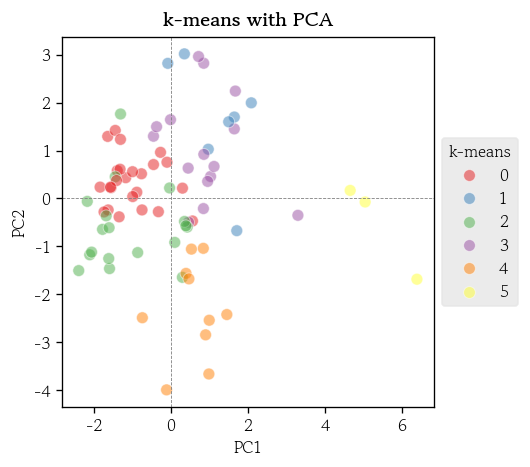

In [49]:
sns.scatterplot(
    data=pca_score, x='PC1', y='PC2',
    s=50, alpha=0.5,
    hue=df['k-means'], palette='Set1'
)
plt.title(label='k-means with PCA', fontweight='bold')
plt.axvline(x=0, color='0.5', linewidth=0.5, linestyle='--')
plt.axhline(y=0, color='0.5', linewidth=0.5, linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='k-means')
plt.show()

## t-SNE 변환

In [50]:
from sklearn.manifold import TSNE

In [51]:
# t-SNE 모델 생성
tsne = TSNE(n_components=2, perplexity=15, random_state=0)

In [52]:
# 표준화된 데이터를 사용하여 t-SNE 변환 수행
X_tsne = tsne.fit_transform(X=df_scaled)

In [53]:
# t-SNE 변환 결과를 데이터프레임으로 저장
df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])

In [54]:
df_tsne.head()

,tSNE1,tSNE2
0,-5.132522,4.473946
1,0.781169,2.065565
2,-5.044910,4.237910
3,-5.734299,4.795661
4,6.157159,-2.962403


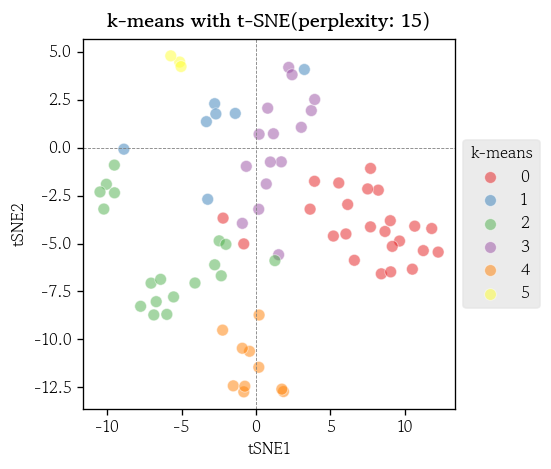

In [56]:
sns.scatterplot(
    data=df_tsne, x='tSNE1', y='tSNE2',
    s=50, alpha=0.5,
    hue=df['k-means'], palette='Set1'
)
plt.title(label='k-means with t-SNE(perplexity: 15)', fontweight='bold')
plt.axvline(x=0, color='0.5', linewidth=0.5, linestyle='--')
plt.axhline(y=0, color='0.5', linewidth=0.5, linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='k-means')
plt.show()

## DBSCAN 군집화

In [57]:
from sklearn.cluster import DBSCAN

In [59]:
# DBSCAN 모델 생성
dbscan = DBSCAN(eps=2.0, min_samples=5)

In [60]:
# 표준화된 데이터로 DBSCAN 군집화 모델 학습
df['dbscan'] = dbscan.fit_predict(X=df_scaled)

In [ ]:
# DBSCAN 군집별 도수 확인
df['dbscan'].value_counts().sort_index()
# dbscan
# -1    22
#  0    50
#  1     5
# Name: count, dtype: int64

dbscan
-1    22
 0    50
 1     5
Name: count, dtype: int64

## DBSCAN 시각화

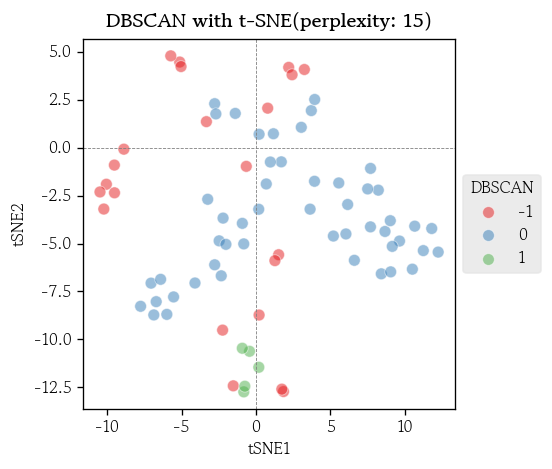

In [63]:
sns.scatterplot(
    data=df_tsne, x='tSNE1', y='tSNE2',
    s=50, alpha=0.5,
    hue=df['dbscan'], palette='Set1'
)
plt.title(label='DBSCAN with t-SNE(perplexity: 15)', fontweight='bold')
plt.axvline(x=0, color='0.5', linewidth=0.5, linestyle='--')
plt.axhline(y=0, color='0.5', linewidth=0.5, linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='DBSCAN')
plt.show()

In [1]:
import pingouin as pg

In [ ]:
pg.chi2_independence()
pg.ttest()
pg.mwu()
pg.anova()
pg.welch_anova()
pg.kruskal()
pg.wilcoxon()

In [2]:
import scikit_posthocs as sp

In [ ]:
sp.posthoc_tukey()
sp.posthoc_tamhane()
sp.posthoc_nemenyi()
sp.posthoc_scheffe()